In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import spacy

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
df = pd.read_csv('/home/cneiderer/Downloads/inaug_speeches_mod.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and o...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again calle...
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in ea..."
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALL...
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to th..."


In [4]:
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [5]:
docs = list(df.text)
len(docs)

58

In [6]:
nlp = spacy.load('en')

In [7]:
doc = nlp(docs[0])

In [8]:
from sklearn.feature_extraction import stop_words
 
print(stop_words.ENGLISH_STOP_WORDS)

frozenset({'part', 'thereafter', 'become', 'the', 'than', 'mine', 'then', 'hence', 'never', 'no', 'somehow', 'yourself', 'eight', 'as', 'otherwise', 'ours', 'both', 'becoming', 'herein', 'bottom', 'eg', 'sixty', 'so', 'toward', 'fifteen', 'mostly', 'out', 'on', 'hereafter', 'mill', 'more', 'being', 'her', 'also', 'inc', 'will', 'with', 'below', 'beyond', 'two', 'therein', 'even', 'anyone', 'here', 'myself', 'ten', 'give', 'yet', 'though', 'for', 'everything', 'noone', 'whole', 'nor', 'above', 'therefore', 'namely', 'moreover', 'him', 'everyone', 'six', 'system', 'together', 'third', 'when', 'should', 'himself', 'thereby', 'they', 'show', 'because', 'amongst', 'call', 'bill', 'less', 'whereas', 'off', 'full', 'very', 'put', 'any', 'amount', 'beforehand', 'neither', 'not', 'have', 'twenty', 'three', 'thin', 'you', 'hereby', 'nine', 'yours', 'while', 'seems', 'how', 'may', 'please', 'already', 'or', 'most', 'this', 'nowhere', 'whereupon', 'through', 'too', 'amoungst', 'ourselves', 'somewh

In [9]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(ngram_range=(2, 4), min_df=0.02, max_df=0.8,
                                   stop_words='english')
dtm_tf = count_vectorizer.fit(docs)

In [11]:
# Create the term-document matrix
# Transpose it so the terms are the rows
counts = count_vectorizer.transform(docs).transpose()

In [12]:
counts.shape

(3444, 58)

In [13]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(counts)

In [14]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [15]:
len(id2word)

3444

In [16]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, 
                      num_topics=20, 
                      alpha='asymmetric',
                      minimum_probability=0.03, 
                      id2word=id2word, passes=10)

In [17]:
# lda.print_topics()

In [18]:
# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]
lda_corpus

In [19]:
# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

In [20]:
# Check out the document vectors in the topic space for the first 5 documents
for pres in zip(df['Name'], lda_docs):
# for pres in zip(df['Name'], df['Date'], lda_docs):
    print(pres)

('George Washington', [(7, 0.99150479)])
('George Washington', [(6, 0.95016479)])
('John Adams', [(11, 0.99489915)])
('Thomas Jefferson', [(15, 0.99425203)])
('Thomas Jefferson', [(1, 0.99303716)])
('James Madison', [(15, 0.98687291)])
('James Madison', [(14, 0.98356164)])
('James Monroe', [(11, 0.99627793)])
('James Monroe', [(14, 0.9962697)])
('John Quincy Adams', [(12, 0.99652439)])
('Andrew Jackson', [(10, 0.99018854)])
('Andrew Jackson', [(3, 0.40472555), (4, 0.30820501), (11, 0.28014714)])
('Martin Van Buren', [(3, 0.059856609), (10, 0.93638504)])
('William Henry Harrison', [(14, 0.99791425)])
('James Knox Polk', [(4, 0.087322012), (5, 0.042311039), (10, 0.069796301), (11, 0.35506472), (14, 0.27475545), (15, 0.16919769)])
('Zachary Taylor', [(16, 0.9930014)])
('Franklin Pierce', [(2, 0.99480712)])
('James Buchanan', [(9, 0.76080918), (10, 0.045706239), (14, 0.17388737)])
('Abraham Lincoln', [(5, 0.034720551), (11, 0.065119281), (15, 0.03610551), (18, 0.8601293)])
('Abraham Lincol

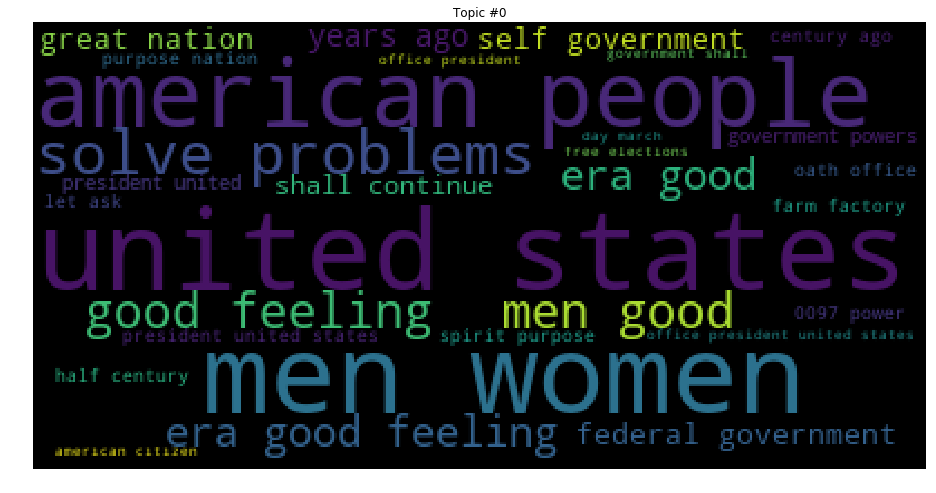

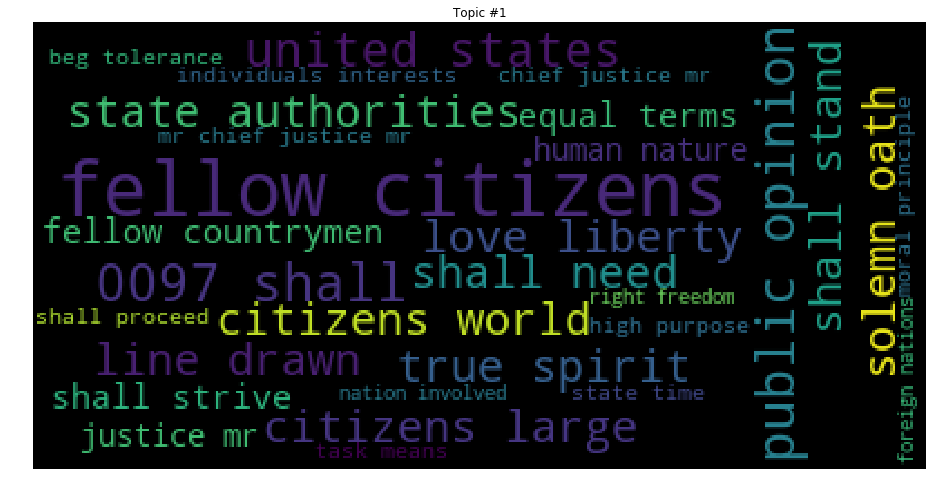

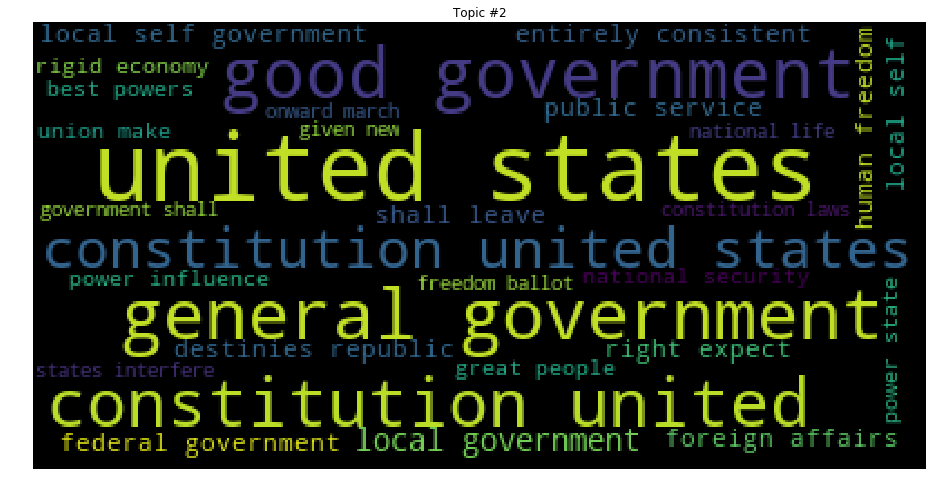

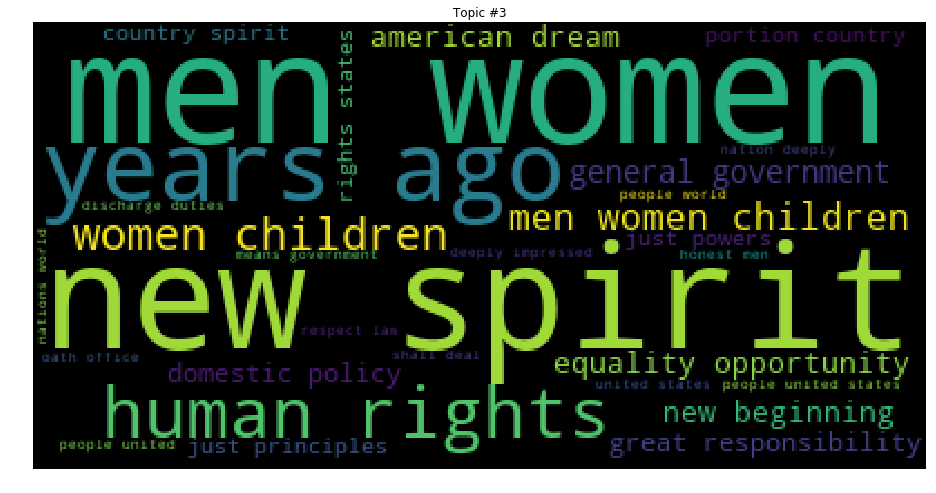

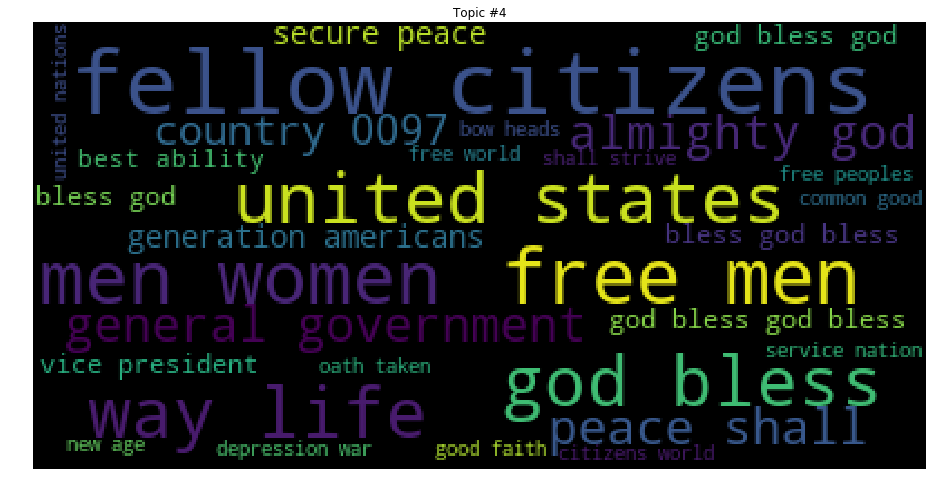

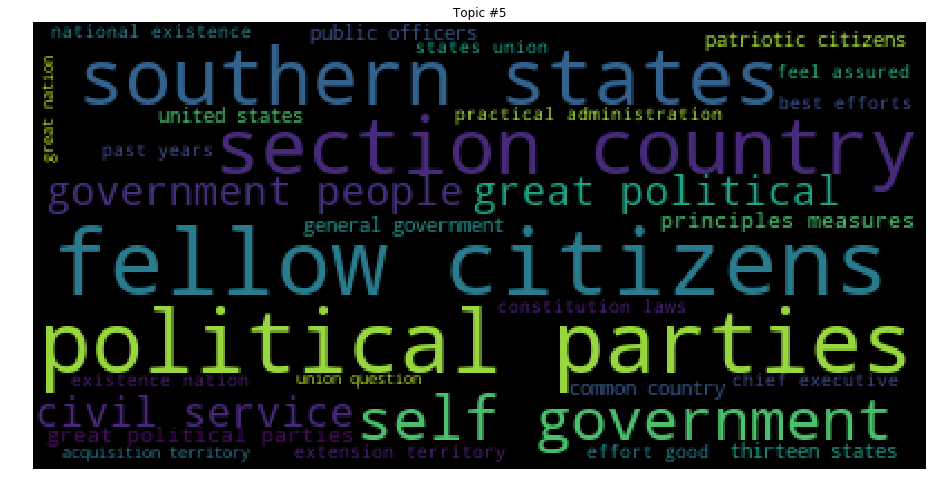

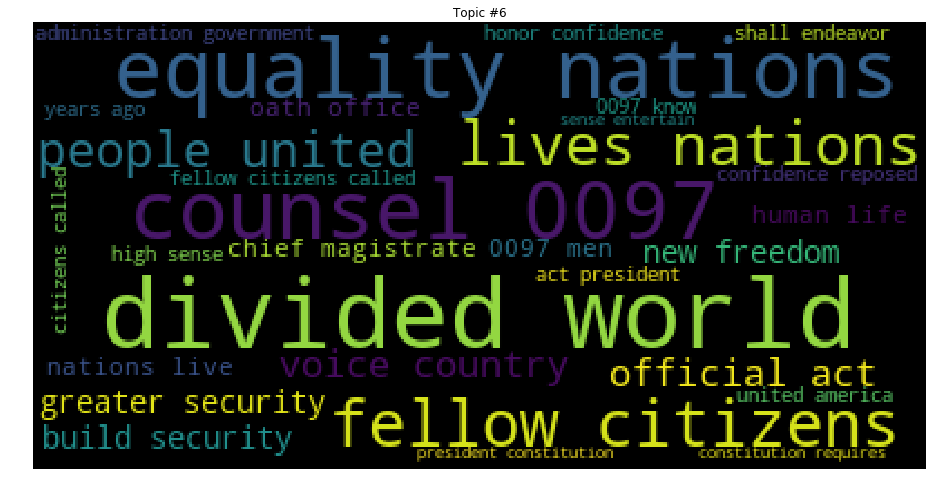

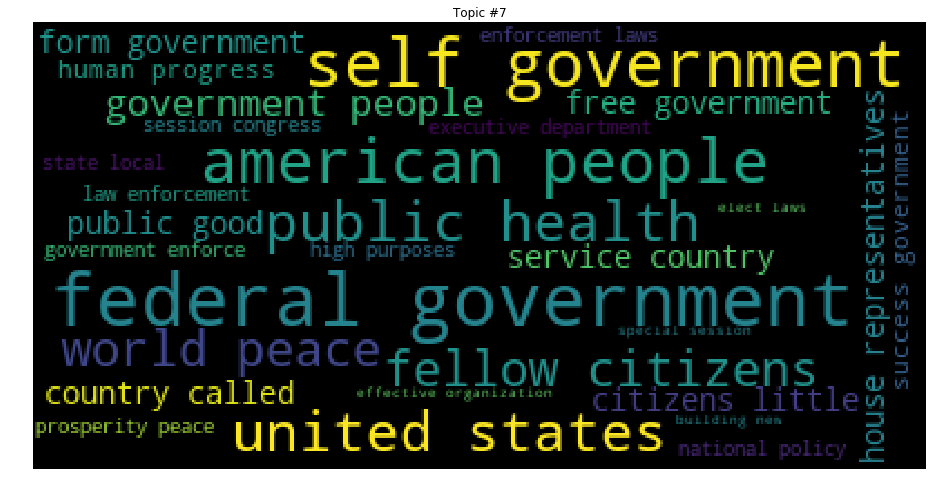

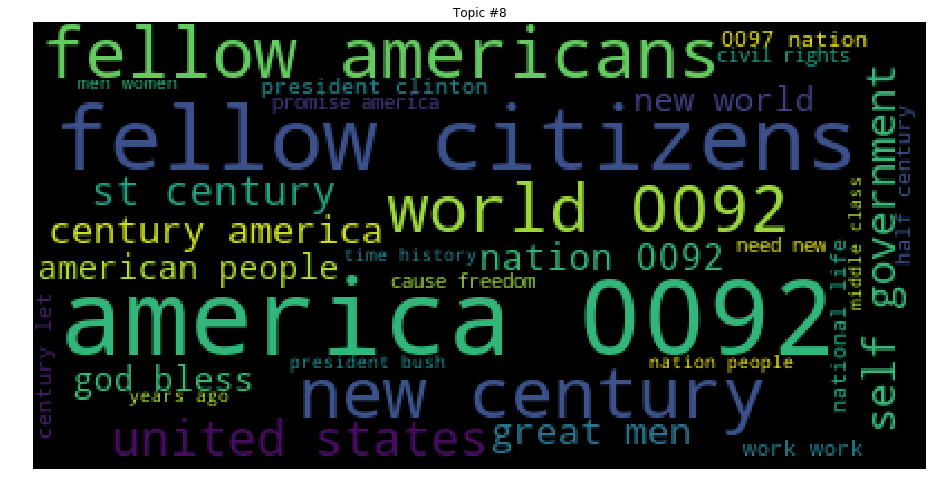

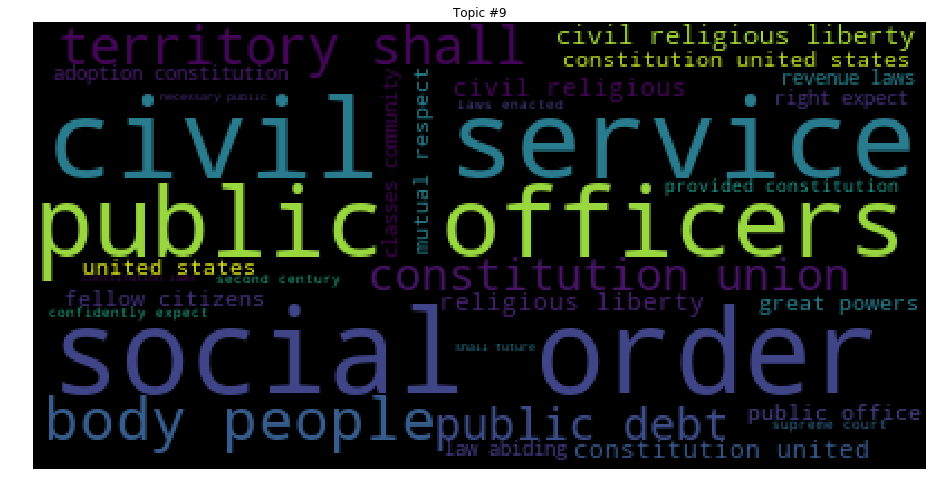

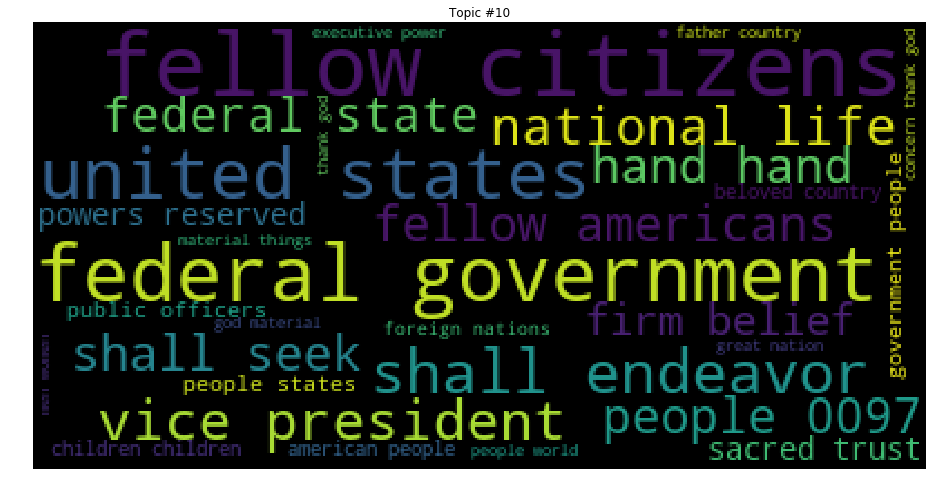

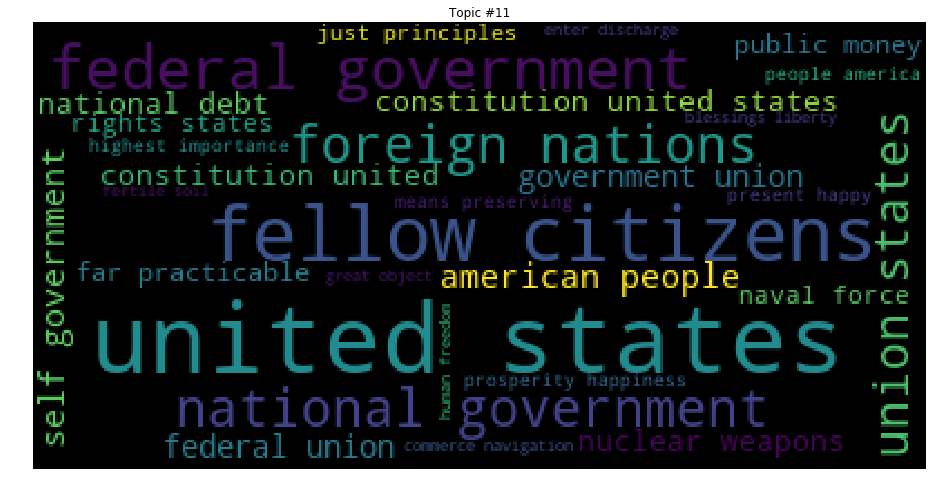

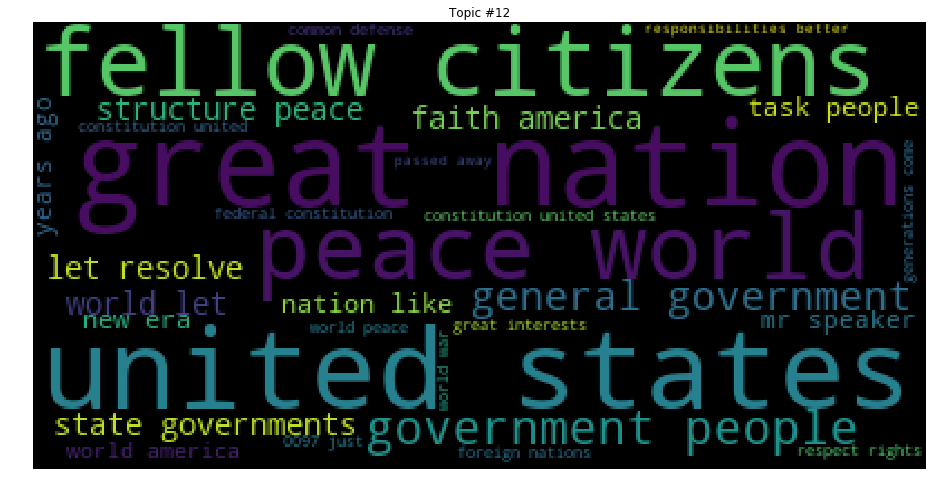

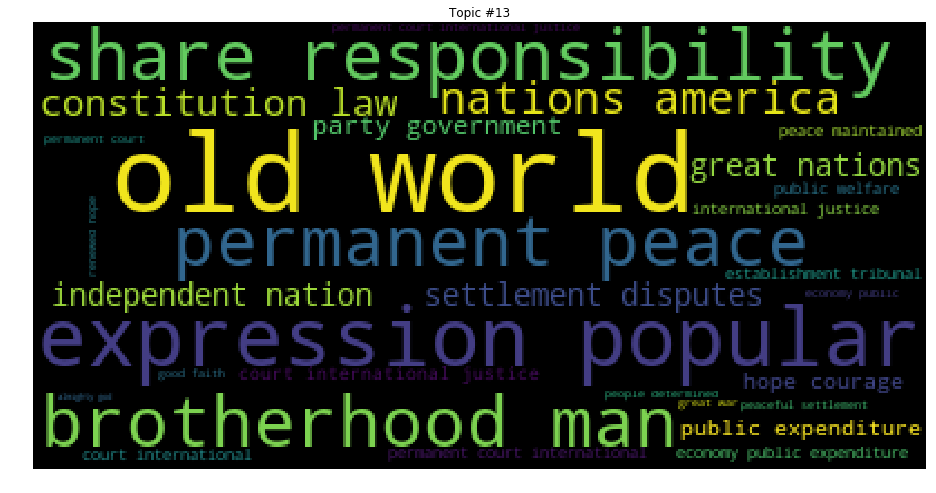

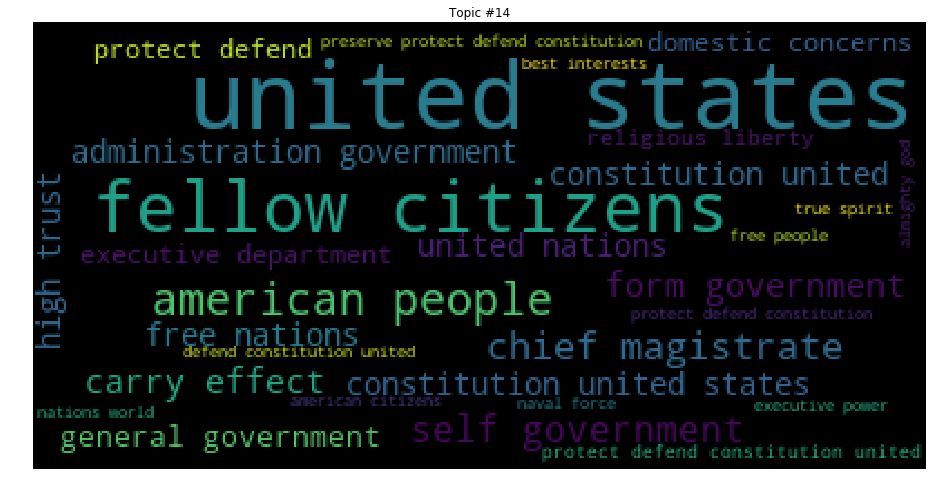

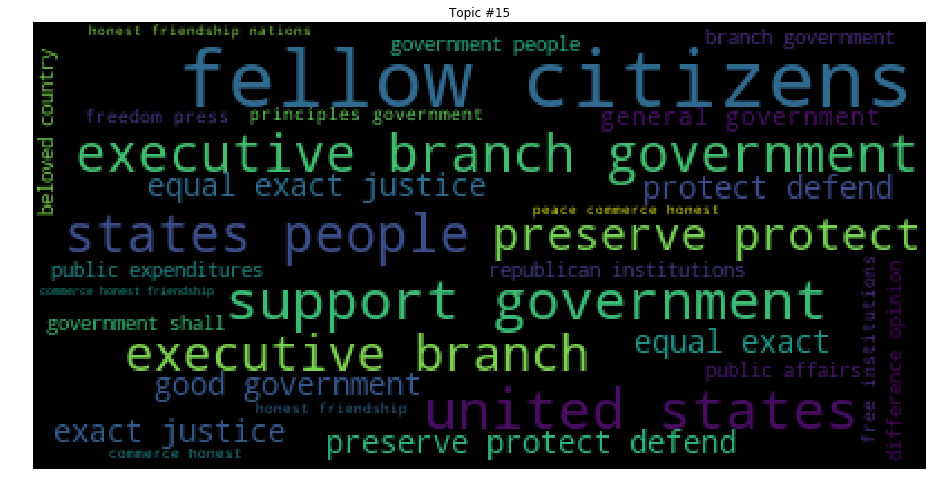

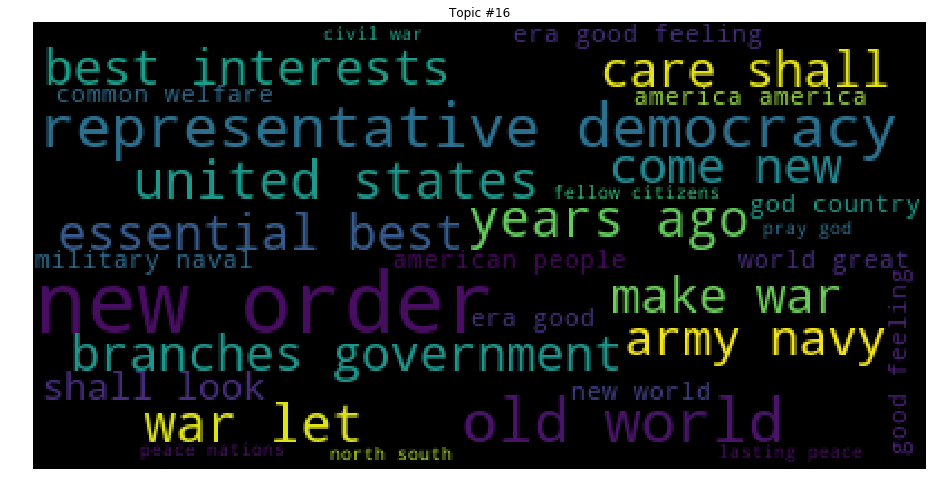

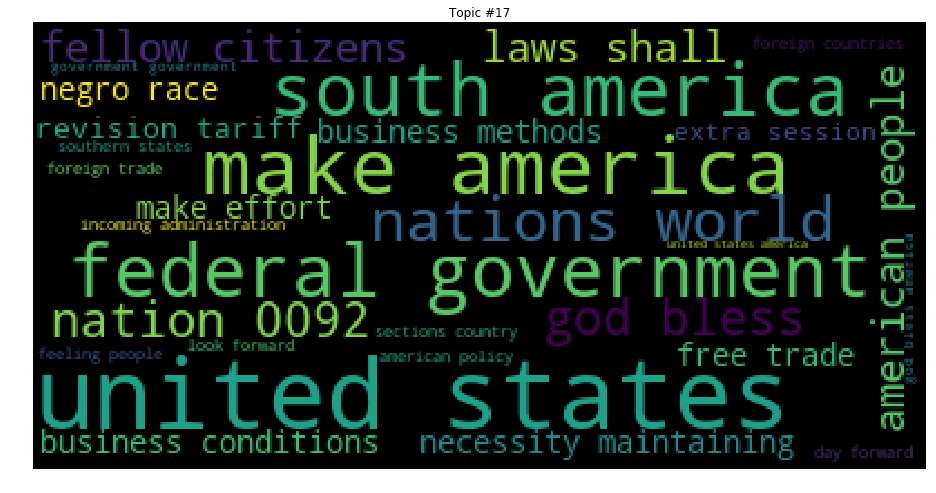

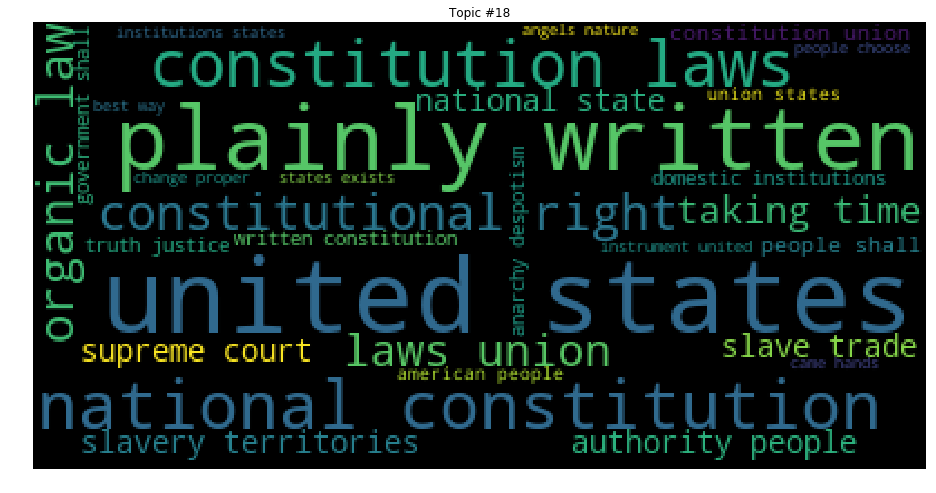

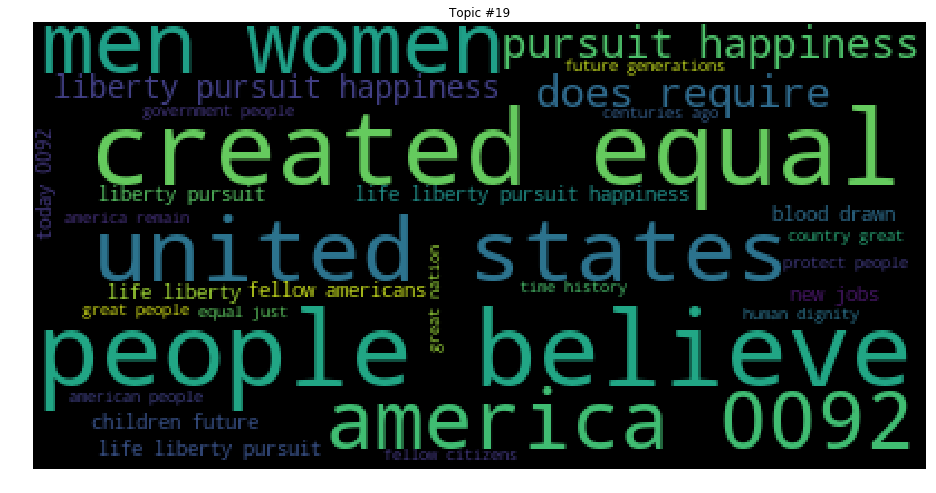

In [21]:
num_words = 30 # Number of words to include in word cloud
for t in range(lda.num_topics):
    plt.figure(figsize=(16,12))
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, num_words))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [22]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [25]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(docs)
print(dtm_tf.shape)

(58, 819)


In [27]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_topics=20, random_state=0)
lda_tf.fit(dtm_tf)

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=20,
             perp_tol=0.1, random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [33]:
h = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
h

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
13     39.594221        1       1 -0.054100  0.025877
14     26.502974        1       2  0.117976 -0.053859
8      13.082745        1       3 -0.033112  0.024443
6       7.871411        1       4 -0.087821 -0.035589
3       4.928903        1       5 -0.093963 -0.007461
11      2.697620        1       6  0.039743  0.078932
17      1.942925        1       7  0.052790  0.045017
2       1.523651        1       8  0.020456 -0.015449
10      0.966269        1       9  0.006674 -0.004988
4       0.746896        1      10  0.016543 -0.004899
19      0.014239        1      11  0.023073 -0.017147
18      0.014239        1      12 -0.005156 -0.005400
9       0.014239        1      13 -0.009737 -0.004143
15      0.014239        1      14  0.004276 -0.008119
12      0.014239        1      15  0.002993  0.002489
5       0.014239        1      16  0.001113 -0.000555
0       0.014239        1      17  0.000851 -0.003177
1       0.014239        1      18  0.000322 -0.007352
7       0.014239        1      19 -0.002030 -0.005787
16      0.014239        1      20 -0.000891 -0.002836, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
143   Default  125.000000        congress  125.000000  30.0000  30.0000
103   Default   54.000000         century   54.000000  29.0000  29.0000
770   Default   93.000000           today   93.000000  28.0000  28.0000
35    Default   73.000000       americans   73.000000  27.0000  27.0000
508   Default   79.000000       necessary   79.000000  26.0000  26.0000
416   Default   71.000000    institutions   71.000000  25.0000  25.0000
609   Default   46.000000         promise   46.000000  24.0000  24.0000
280   Default   88.000000       executive   88.000000  23.0000  23.0000
114   Default   53.000000        children   53.000000  22.0000  22.0000
107   Default   66.000000          change   66.000000  21.0000  21.0000
343   Default   71.000000         general   71.000000  20.0000  20.0000
676   Default   60.000000         revenue   60.000000  19.0000  19.0000
626   Default   60.000000        question   60.000000  18.0000  18.0000
612   Default   63.000000          proper   63.000000  17.0000  17.0000
741   Default   60.000000         subject   60.000000  16.0000  16.0000
132   Default   62.000000        commerce   62.000000  15.0000  15.0000
657   Default   59.000000        republic   59.000000  14.0000  14.0000
91    Default   63.000000        business   63.000000  13.0000  13.0000
454   Default   58.000000            like   58.000000  12.0000  12.0000
380   Default   54.000000            help   54.000000  11.0000  11.0000
312   Default   68.000000         federal   68.000000  10.0000  10.0000
235   Default   61.000000           earth   61.000000   9.0000   9.0000
539   Default   58.000000           ought   58.000000   8.0000   8.0000
109   Default   55.000000       character   55.000000   7.0000   7.0000
461   Default   46.000000           lives   46.000000   6.0000   6.0000
666   Default   58.000000         respect   58.000000   5.0000   5.0000
100   Default   55.000000           cause   55.000000   4.0000   4.0000
192   Default   49.000000       democracy   49.000000   3.0000   3.0000
460   Default   51.000000            live   51.000000   2.0000   2.0000
597   Default   56.000000       principle   56.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
599   Topic20    0.004152       privilege   15.839278   0.6103  -6.5442
181   Topic20    0.004225     declaration   16.883994   0.5639  -6.5267
166   Topic20    0.004246          create   17.142067   0.5536  -6.5219
522   Topic20    0.003965         observe   14.584615   0.6469  -6.5902
562   Topic20    0.004041         persons   15.391075   0.6119  -6.5713
523   Topic20    0.004137        

In [34]:
pyLDAvis.save_html(h, 'test_output.html')

In [35]:
lda_tf

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=20,
             perp_tol=0.1, random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [36]:
dtm_tf

<58x819 sparse matrix of type '<class 'numpy.int64'>'
	with 12794 stored elements in Compressed Sparse Row format>

In [37]:
tf_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='\\b[a-zA-Z]{3,}\\b',
        tokenizer=None, vocabulary=None)